## Import dependencies

In [280]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mticker  

## Load data and perform necessary manipulations 

In [281]:
ticket = pd.read_csv('../data_cleaning/ticket_cleaned.csv')
customer = pd.read_csv('../data_cleaning/customer_cleaned.csv')
data = ticket.merge(customer, on='customerid', how='left', suffixes=('',''))

In [282]:
data.head()

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,...,purchased in advance,DOB,gender,address,Website,job,industry,age,district,city
0,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074925,2019-05-06,18:15:00,G04,3,...,0 days,1999-04-18,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer,24.0,Quận Thanh Khê,Đà Nẵng
1,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074924,2019-05-06,18:15:00,G03,3,...,0 days,1999-04-18,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer,24.0,Quận Thanh Khê,Đà Nẵng
2,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097042,2019-05-22,20:45:00,E04,2,...,0 days,1998-04-16,Nam,man thai,KH0104|0333,student,health service,25.0,Quận Sơn Trà,Đà Nẵng
3,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097041,2019-05-22,20:45:00,E03,2,...,0 days,1998-04-16,Nam,man thai,KH0104|0333,student,health service,25.0,Quận Sơn Trà,Đà Nẵng
4,10130052019B0141,emp005,2019-05-30,90000,0000000034,20106761,2019-05-30,19:30:00,F04,1,...,0 days,1998-04-16,Nam,man thai,KH0104|0333,student,health service,25.0,Quận Sơn Trà,Đà Nẵng


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35378 entries, 0 to 35377
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   orderid               35378 non-null  object 
 1   cashier               35378 non-null  object 
 2   saledate              35378 non-null  object 
 3   total                 35378 non-null  int64  
 4   customerid            35378 non-null  object 
 5   ticketcode            35378 non-null  int64  
 6   date                  35378 non-null  object 
 7   time                  35378 non-null  object 
 8   slot                  35378 non-null  object 
 9   room                  35378 non-null  int64  
 10  film                  35378 non-null  object 
 11  slot type             35378 non-null  object 
 12  ticket type           35378 non-null  object 
 13  ticket price          35378 non-null  int64  
 14  popcorn               35378 non-null  object 
 15  row                

In [284]:
data['saledate'] = pd.to_datetime(data['saledate'])
data['date'] = pd.to_datetime(data['date'])
data[['cashier', 'slot', 'room', 'slot type', 'ticket type', 'popcorn', 'row', 'seat', 'hour', 'day_of_week']] = data[['cashier', 'slot', 'room', 'slot type', 'ticket type', 'popcorn', 'row', 'seat', 'hour', 'day_of_week']].astype('category')
data['total'] = data['total'].astype('int')
data['hour'] = data['hour'].cat.reorder_categories(new_categories=list(i for i in range(7, 24)), ordered=True)
data['seat'] = data['seat'].cat.reorder_categories(new_categories=list(range(1, 20)), ordered=True)
data['day_of_week'] = data['day_of_week'].cat.reorder_categories(new_categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

In [285]:
rows_to_drop = data[data['age'].isnull()]['customerid'].index
data.drop(rows_to_drop, axis=0, inplace=True)
data['age'] = data['age'].astype('int')

In [286]:
ticket.describe(include='object')

,orderid,cashier,saledate,customerid,date,time,slot,film,slot type,ticket type,popcorn,row,day_of_week,purchased in advance
count,35378,35378,35378,35378,35378,35378,35378,35378,35378,35378,35378,35378,35378,35378
unique,14598,15,30,4451,30,159,190,19,2,1,2,11,7,4
top,10026052019B0285,emp011,2019-05-11,KH6166700,2019-05-11,19:15:00,G09,MẸ MA THAN KHÓC LA LLORONA (C18),ĐƠN,Thành viên,Không,F,Sunday,0 days
freq,43,5894,2094,10132,2094,1567,592,9628,33972,35378,35287,5935,6973,35331


In [287]:
data[data['ticket price']<=0]

# Outlier

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,...,purchased in advance,DOB,gender,address,Website,job,industry,age,district,city
7314,10126052019B0123,emp010,2019-05-26,90000,0000029127,20102169,2019-05-26,17:25:00,D11,4,...,0 days,2000-09-26,Nữ,son tra,KH0104|21817,teenager,NaN,23,Quận Sơn Trà,Đà Nẵng


## Data Exploratory Analysis 

### Popcorn and price investigation

In [288]:
check = data.groupby(by='orderid')['total'].mean() - data.groupby('orderid')['ticket price'].sum()

#Check if there are any difference between the total cost of each order ID and the sum of all ticket price 

In [289]:
check[check!=0]

#These differences might be due to the popcorn price. However, why are there negative values ?

orderid
10005052019B0017    -10000.0
10006052019B0304     45000.0
10006052019B0305     45000.0
10009052019B0316     -5000.0
10013052019B0163     45000.0
10019052019B0304     45000.0
10019052019B0305     45000.0
10020052019B0075    -90000.0
10026052019B0063    225000.0
10027052019B0223     45000.0
10028052019B0057     45000.0
10029052019B0012     45000.0
10030052019B0068     45000.0
10101052019B0072    225000.0
10108052019B0139     45000.0
10108052019B0165     45000.0
10109052019B0101     -5000.0
10111052019B0123     45000.0
10115052019B0108     45000.0
12505052019B0026     90000.0
12515052019B0024     90000.0
dtype: float64

In [290]:
check_false = check[check!=0].index

In [291]:
data[np.logical_and(data['orderid'].isin(check_false), data['popcorn']!='Có')]

# We can conclude that all differences in the prices are results of purchasing popcorn

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,...,purchased in advance,DOB,gender,address,Website,job,industry,age,district,city


In [292]:
popcorn_purchase = list(data[data['popcorn']=='Có']['orderid'].unique())

# List of people who purchased popcorn

In [293]:
wrong_total_id = []

for id in popcorn_purchase:
    if id not in check[check!=0].index:
        wrong_total_id.append(id)
        
for id, value in check.items():
    if value!=0 and id not in popcorn_purchase:
        wrong_total_id.append(id)

#Listing miscalculation and popcorn 

In [294]:
data[data['orderid'].isin(wrong_total_id)].head()

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,...,purchased in advance,DOB,gender,address,Website,job,industry,age,district,city
3445,12502052019B0013,emp010,2019-05-02,135000,0000029127,20071475,2019-05-02,19:05:00,J07,1,...,0 days,2000-09-26,Nữ,son tra,KH0104|21817,teenager,NaN,23,Quận Sơn Trà,Đà Nẵng
3448,12502052019B0013,emp010,2019-05-02,135000,0000029127,20071474,2019-05-02,19:05:00,E13,1,...,0 days,2000-09-26,Nữ,son tra,KH0104|21817,teenager,NaN,23,Quận Sơn Trà,Đà Nẵng
3932,10009052019B0239,emp008,2019-05-09,405000,0000029127,20078926,2019-05-09,17:00:00,I04,1,...,0 days,2000-09-26,Nữ,son tra,KH0104|21817,teenager,NaN,23,Quận Sơn Trà,Đà Nẵng
3933,10009052019B0239,emp008,2019-05-09,405000,0000029127,20078923,2019-05-09,17:00:00,I01,1,...,0 days,2000-09-26,Nữ,son tra,KH0104|21817,teenager,NaN,23,Quận Sơn Trà,Đà Nẵng
3934,10009052019B0239,emp008,2019-05-09,405000,0000029127,20078925,2019-05-09,17:00:00,I03,1,...,0 days,2000-09-26,Nữ,son tra,KH0104|21817,teenager,NaN,23,Quận Sơn Trà,Đà Nẵng


In [295]:
wrong_cashier = data[data['orderid'].isin(check_false)][['orderid', 'cashier']].drop_duplicates()['cashier'].value_counts()
wrong_cashier

cashier
emp006    5
emp007    3
emp012    3
emp004    2
emp011    2
emp001    1
emp002    1
emp005    1
emp008    1
emp014    1
emp015    1
emp003    0
emp009    0
emp010    0
emp013    0
Name: count, dtype: int64

d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed

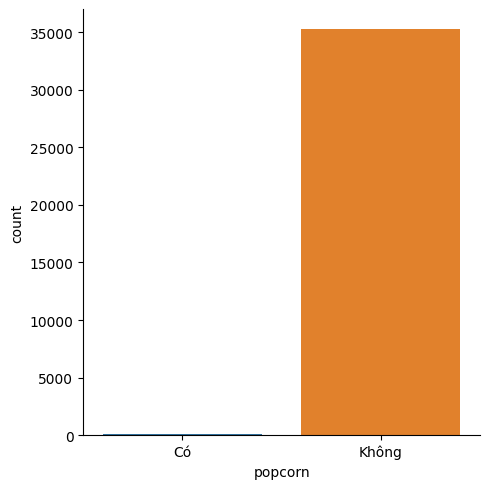

In [296]:
sns.catplot(data=data, x='popcorn', kind='count')

In [297]:
price_diff=pd.DataFrame(data[data['popcorn']=='Có'].groupby('orderid')['ticket price'].sum().reset_index()).merge(data[['orderid', 'total']].drop_duplicates(), on='orderid', how='left')
price_diff['diff'] = abs(price_diff['ticket price'] - price_diff['total'])
price_diff.head()

,orderid,ticket price,total,diff
0,10005052019B0017,135000,125000,10000
1,10005052019B0417,180000,180000,0
2,10006052019B0304,45000,90000,45000
3,10006052019B0305,45000,90000,45000
4,10009052019B0239,405000,405000,0


d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='diff', ylabel='Count'>

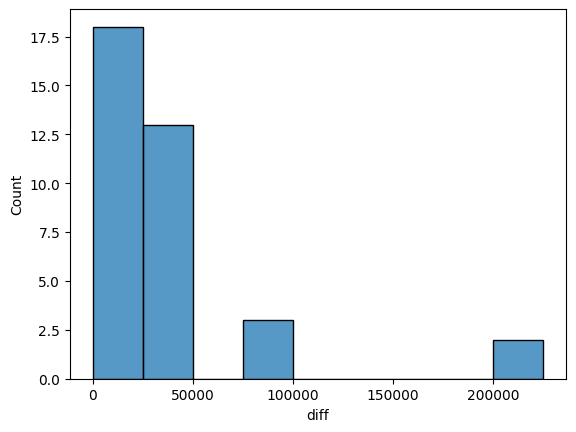

In [298]:
sns.histplot(data=price_diff, x='diff')

d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


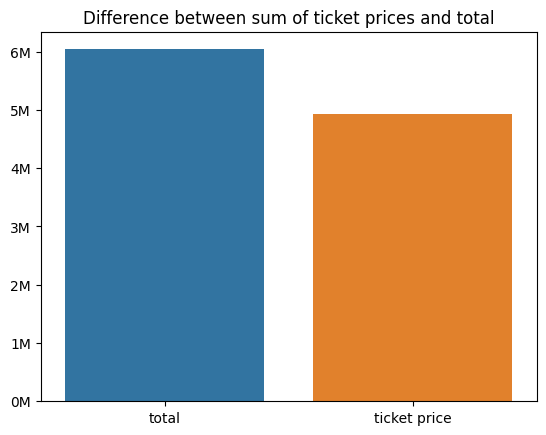

In [333]:
def format_ticks(value, _):
    return f"{int(value / 10**6)}M"

sns.barplot(x=price_diff[['total', 'ticket price']].sum().index, y=price_diff[['total', 'ticket price']].sum().values)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.f VND'))
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.title('Difference between sum of ticket prices and total')
plt.show()

### Revenue Analysis

In [300]:
# Convert unit to million
desired_unit = 1000000  
def format_ticks(value, _):
    return f"{int(value / desired_unit)}M"

d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


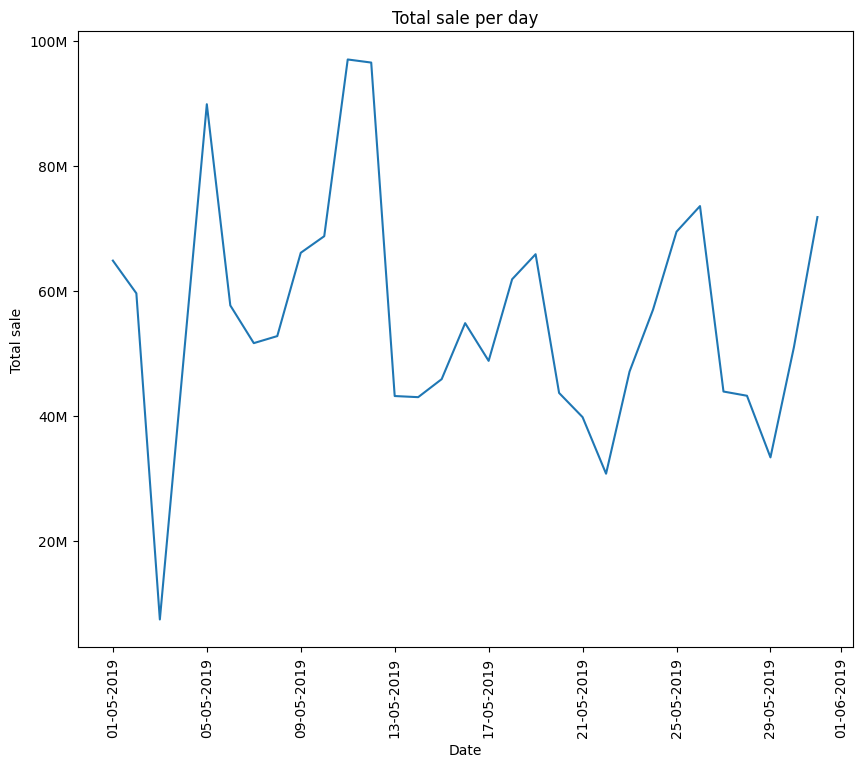

In [301]:
total_by_date = data.groupby('saledate')['ticket price'].sum()
plt.figure(figsize=(10, 8))
sns.lineplot(data=total_by_date)
plt.title('Total sale per day')
plt.xlabel('Date')
plt.ylabel('Total sale')
plt.xticks(rotation=90)
date_format = DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.f VND'))
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.show()

In [302]:
# The increases mainly occurs during weekends or holidays

In [303]:
peak_day = total_by_date.idxmax()
print(peak_day)

2019-05-11 00:00:00


In [304]:
data.groupby('film')['saledate'].min()

# To see if the release of any movies causes a dramatic rise in the revenue

film
(LT) DORAEMON: NOBITA VÀ MẶT TRĂNG PHIÊU LƯU KÝ (G)   2019-05-22
(PĐ) DORAEMON: NOBITA VÀ MẶT TRĂNG PHIÊU LƯU KÝ (G)   2019-05-26
ALADDIN (LT) (G)                                      2019-05-23
ALADDIN (PD) (G)                                      2019-05-24
AVENGERS: HỒI KẾT                                     2019-05-01
CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13)               2019-05-27
CORGI: NHỮNG CHÚ CHÓ HOÀNG GIA (LT)                   2019-05-09
CÀ CHỚN ANH ĐỪNG ĐI                                   2019-05-17
JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18)               2019-05-15
LẬT MẶT: NHÀ CÓ KHÁCH                                 2019-05-02
MẸ MA THAN KHÓC LA LLORONA (C18)                      2019-05-01
NGÔI ĐỀN KỲ QUÁI (C18)                                2019-05-24
NỤ HÔN MA QUÁI (C18)                                  2019-05-31
POKÉMON: THÁM TỬ PIKACHU (C13)                        2019-05-10
QUÝ CÔ LỪA ĐẢO                                        2019-05-10
THẰNG EM LÝ TƯỞNG   

In [305]:
# Seems that there is no relevance between the movie releasing schedule and total sale

C:\Users\HP\AppData\Local\Temp\ipykernel_11112\1782796855.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_day = data.groupby('day_of_week')['ticket price'].sum()
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


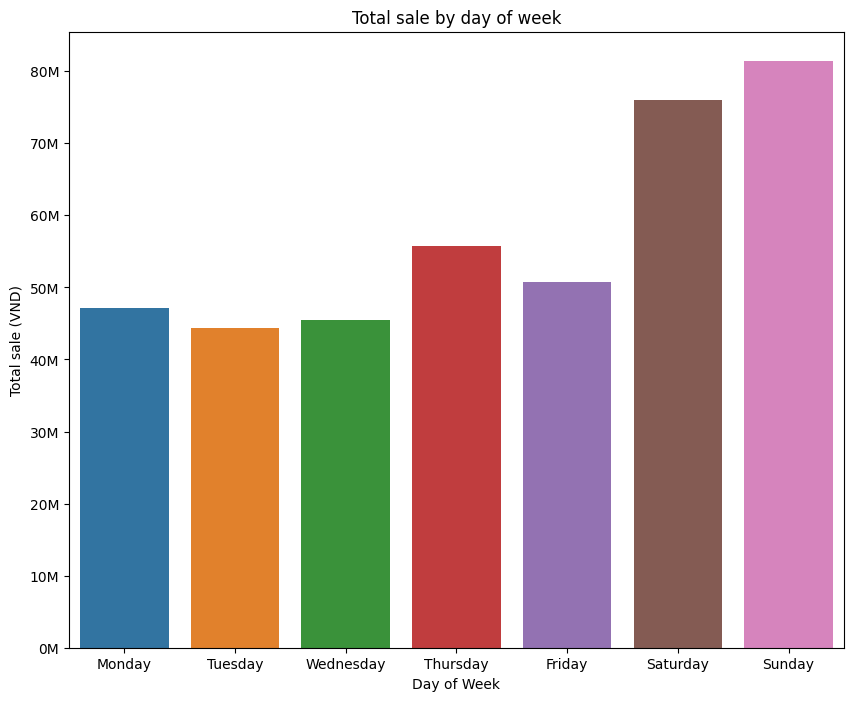

In [306]:
total_by_day = data.groupby('day_of_week')['ticket price'].sum()
for day in total_by_day.index:
    total_by_day.loc[day] /= data[data['day_of_week']==day]['saledate'].nunique()
plt.figure(figsize=(10, 8))
sns.barplot(x=total_by_day.index, y=total_by_day.values)
plt.xlabel('Day of Week')
plt.ylabel('Total sale (VND)')
plt.title('Total sale by day of week')
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.show()

In [307]:
# The sale on the weekends dominates the days during the week, which is quite reasonable

In [308]:
outliers = ['KH6166700','0000029127','0001121703']

d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


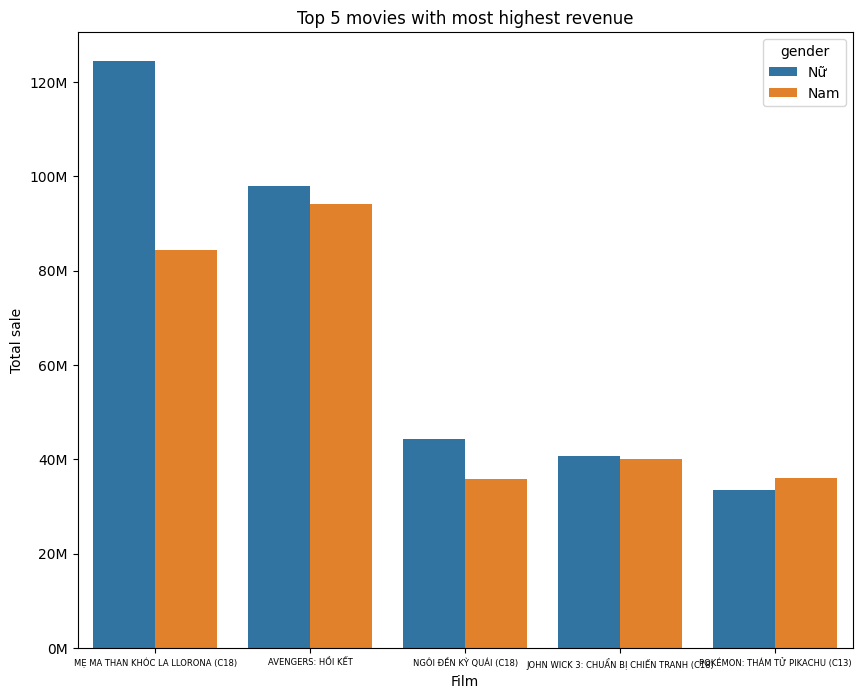

In [309]:
total_by_film = pd.DataFrame(data[~data['customerid'].isin(outliers)].groupby(['film', 'gender'])['ticket price'].sum().sort_values(ascending=False))
total_by_film.reset_index(inplace=True)
plt.figure(figsize=(10, 8))
sns.barplot(data=total_by_film.iloc[:10], x='film', y='ticket price', hue='gender')
plt.xlabel('Film')
plt.ylabel('Total sale')
plt.title('Top 5 movies with most highest revenue')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.f VND'))
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.xticks(fontsize=6)
plt.show()

d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


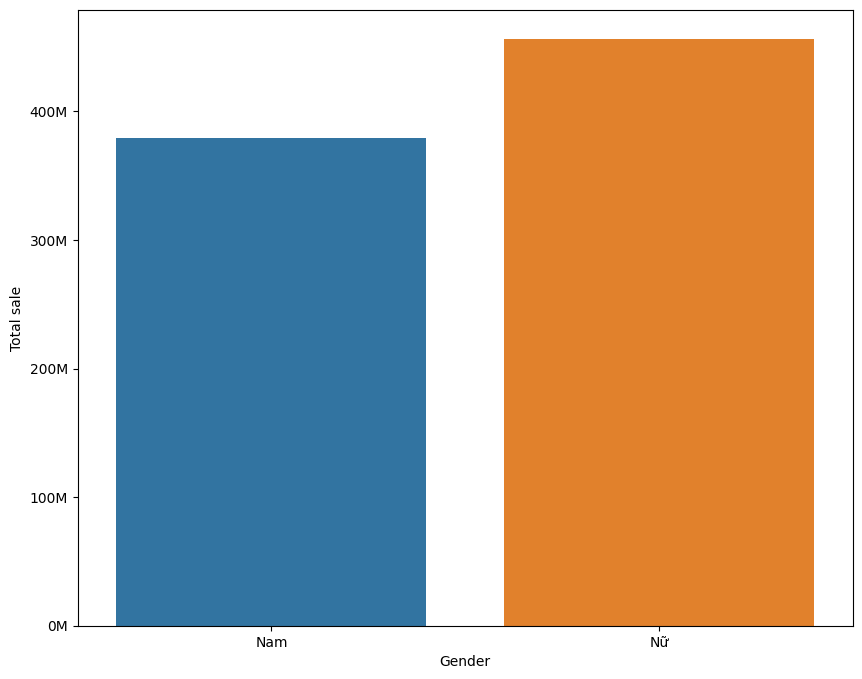

In [310]:
total_by_gender = data[~data['customerid'].isin(outliers)].groupby('gender')['ticket price'].sum()
plt.figure(figsize=(10, 8))
sns.barplot(x=total_by_gender.index, y=total_by_gender.values)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.f VND'))
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.xlabel('Gender')
plt.ylabel('Total sale')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11112\829629201.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_hour = data.groupby('hour')['ticket price'].sum()/31
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future 

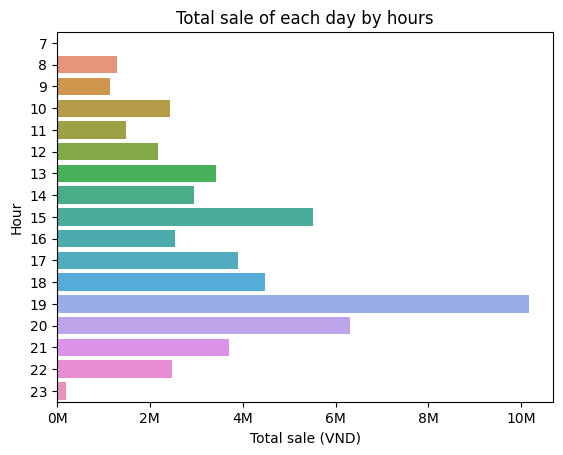

In [311]:
total_by_hour = data.groupby('hour')['ticket price'].sum()/31
sns.barplot(y=total_by_hour.index, x=total_by_hour.values)
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.f VND'))
plt.tick_params(axis='x', which='both', labelleft=True, labelright=False)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.ylabel('Hour')
plt.xlabel('Total sale (VND)')
plt.title('Total sale of each day by hours')
plt.show()

In [312]:
# 7p.m is considered as the best time of the day to go to the cinema, followed by 3p.m and 8p.m

C:\Users\HP\AppData\Local\Temp\ipykernel_11112\1114647719.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seat_distribution = data.groupby(by=(['row', 'seat']))['orderid'].count()


<Axes: xlabel='seat', ylabel='row'>

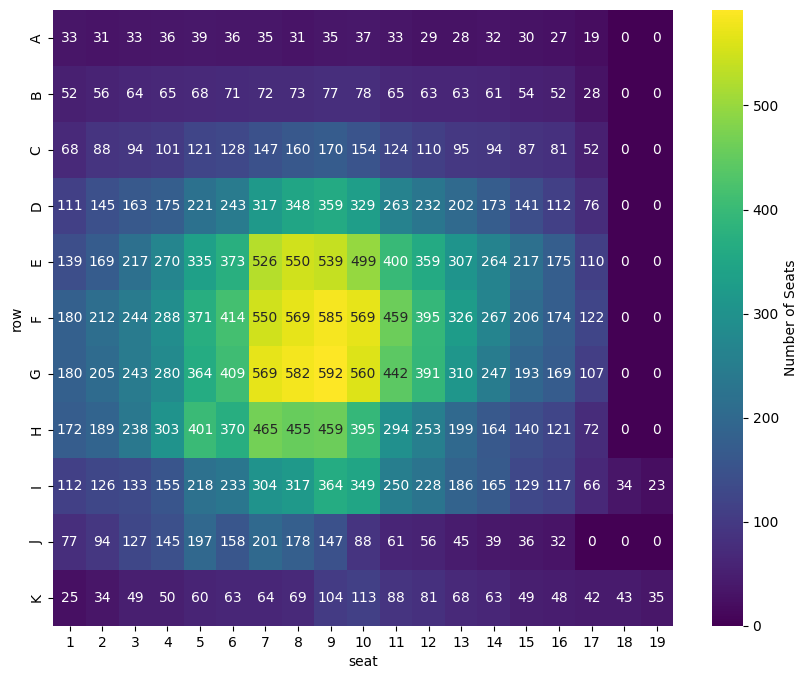

In [313]:
seat_distribution = data.groupby(by=(['row', 'seat']))['orderid'].count()
df = pd.DataFrame(seat_distribution).reset_index().pivot(columns='seat', index='row', values='orderid')
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='viridis', fmt='d', cbar_kws={'label': 'Number of Seats'})
# df

In [314]:
# The majority of customer are in favor of central seats

In [315]:
customer_count = data['customerid'].value_counts().sort_values(ascending=False)
customer_count[customer_count>=30]

customerid
KH6166700     10132
0000029127     7105
0001121703      507
KH3742976        54
0003004563       52
0001161670       45
0001123637       43
0001169541       38
0001080292       32
KH647128         31
0003009776       30
Name: count, dtype: int64

d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


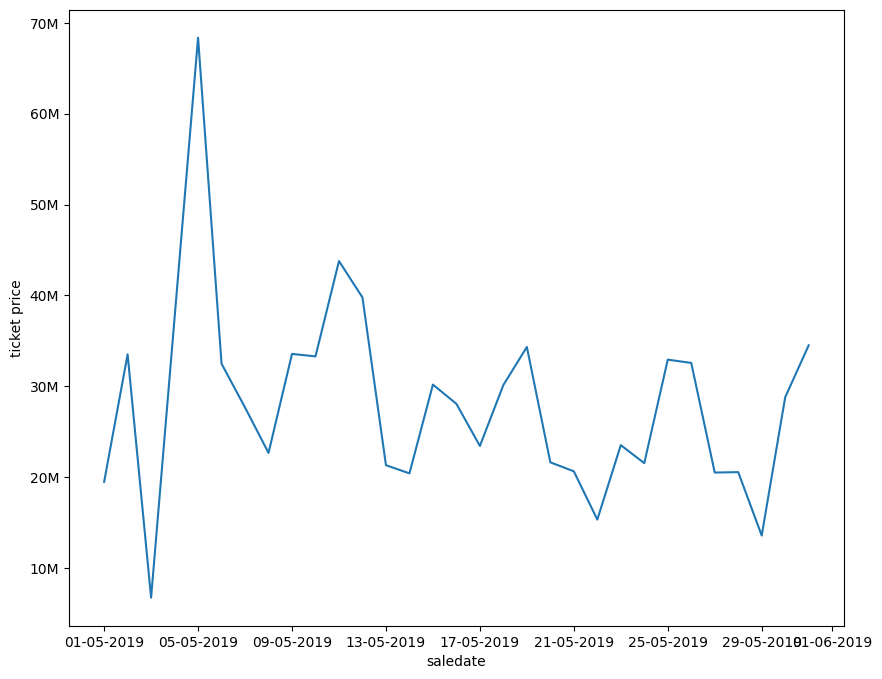

In [316]:
plt.figure(figsize=(10,8))
sns.lineplot(data[~data['customerid'].isin(outliers)].groupby('saledate')['ticket price'].sum())
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.f VND'))
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Python\Lib\si

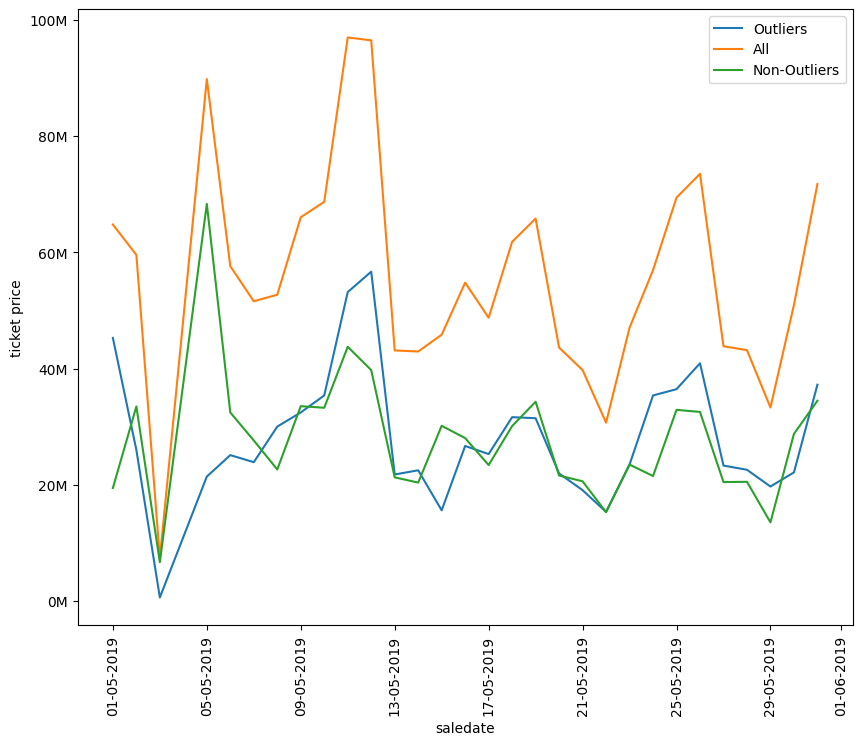

In [317]:
total_by_date = data.groupby('saledate')['ticket price'].sum()
plt.figure(figsize=(10, 8))
sns.lineplot(data=data[data['customerid'].isin(outliers)].groupby('saledate')['ticket price'].sum(), label='Outliers')
sns.lineplot(data=total_by_date, label='All')
sns.lineplot(data[~data['customerid'].isin(outliers)].groupby('saledate')['ticket price'].sum(), label='Non-Outliers')
date_format = DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.f VND'))
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [318]:
customer[customer['customerid'].isin(outliers)].merge(pd.DataFrame(customer_count).reset_index(), on='customerid')

,customerid,DOB,gender,address,Website,job,industry,age,district,city,count
0,0000029127,2000-09-26,Nữ,son tra,KH0104|21817,teenager,NaN,23,Quận Sơn Trà,Đà Nẵng,7105
1,0001121703,2017-07-06,Nữ,son tra,KH0104|42086,teenager,NaN,6,Quận Sơn Trà,Đà Nẵng,507
2,KH6166700,2019-01-25,Nữ,hoa khanh,NaN,teenager,NaN,4,Quận liên chiều,Đà Nẵng,10132


In [319]:
# Suspicious cases with too many appearances, might be cheaters

d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age'>

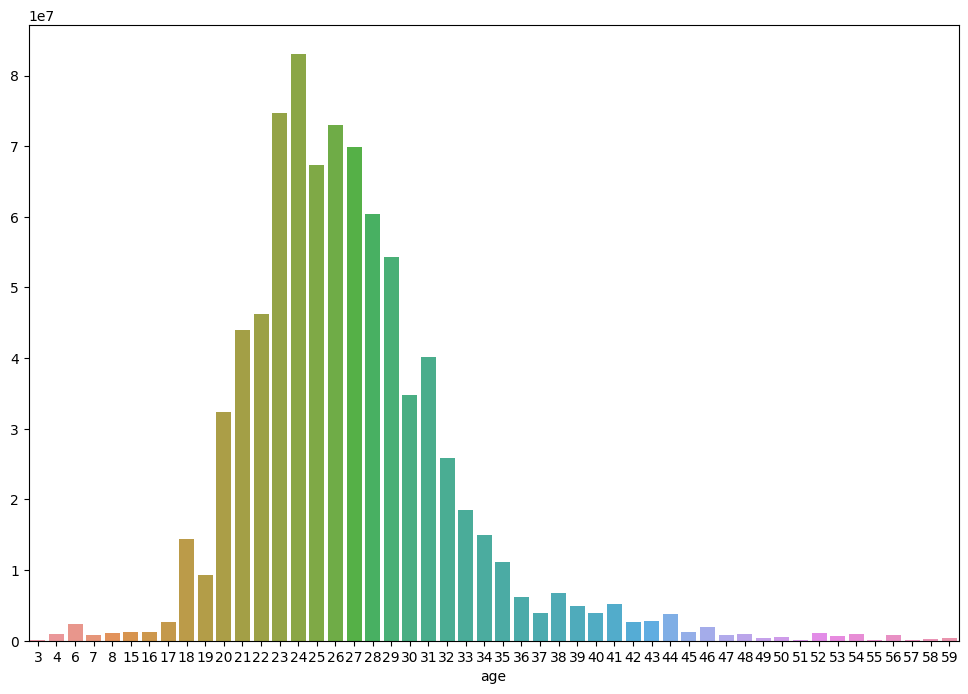

In [337]:
total_by_age = data[~data['customerid'].isin(outliers)].groupby('age')['ticket price'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=total_by_age.index, y=total_by_age.values)

In [321]:
# The most popular group of age is from 20 to 30

In [322]:
data[data['ticket price'].isin([75000, 160000])]['saledate'].value_counts()

saledate
2019-05-01    827
Name: count, dtype: int64

In [323]:
data.columns

Index(['orderid', 'cashier', 'saledate', 'total', 'customerid', 'ticketcode',
       'date', 'time', 'slot', 'room', 'film', 'slot type', 'ticket type',
       'ticket price', 'popcorn', 'row', 'seat', 'hour', 'day_of_week',
       'purchased in advance', 'DOB', 'gender', 'address', 'Website', 'job',
       'industry', 'age', 'district', 'city'],
      dtype='object')

d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


d:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\si

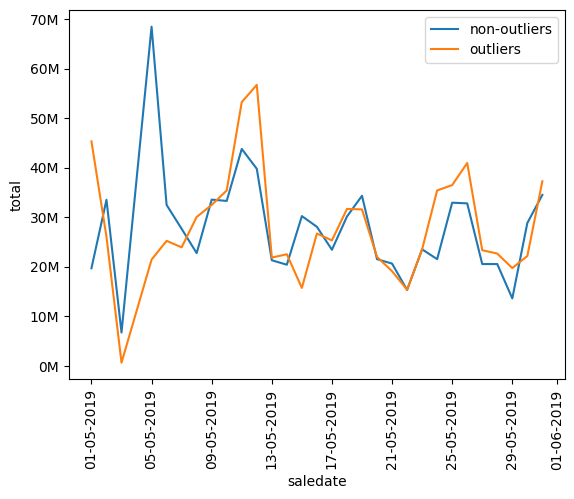

In [324]:
sns.lineplot(data[~data['customerid'].isin(outliers)][['total', 'orderid', 'saledate']].drop_duplicates().groupby('saledate')['total'].sum(), label='non-outliers')
sns.lineplot(data[data['customerid'].isin(outliers)][['total', 'orderid', 'saledate']].drop_duplicates().groupby('saledate')['total'].sum(), label='outliers')
date_format = DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.f VND'))
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [325]:
data['is_outliers'] = data['customerid'].isin(outliers)

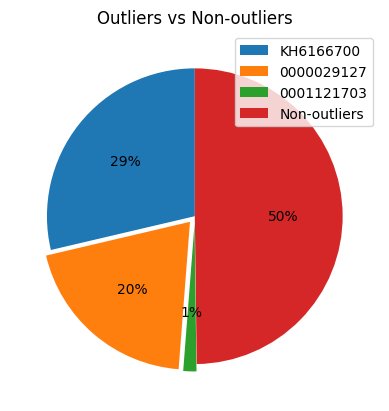

In [326]:
pie_data = data[data['is_outliers']]['customerid'].value_counts()
pie_data['Non-outliers'] = data[~data['is_outliers']].shape[0]
explode = [0, 0.05, 0.05, 0]
plt.pie(x=pie_data.values, labels=None,autopct='%.0f%%', startangle=90, explode=explode)
plt.title('Outliers vs Non-outliers')
plt.legend(pie_data.index)
plt.show()

In [341]:
data[~data['is_outliers']].groupby('film')['ticket price'].sum().sort_values(ascending=False)

film
MẸ MA THAN KHÓC LA LLORONA (C18)                       208830000
AVENGERS: HỒI KẾT                                      191995000
JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18)                 80685000
NGÔI ĐỀN KỲ QUÁI (C18)                                  80010000
POKÉMON: THÁM TỬ PIKACHU (C13)                          69525000
CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13)                 36270000
ALADDIN (PD) (G)                                        32220000
ALADDIN (LT) (G)                                        26865000
ƯỚC HẸN MÙA THU                                         21780000
THẰNG EM LÝ TƯỞNG                                       20790000
LẬT MẶT: NHÀ CÓ KHÁCH                                   15705000
(LT) DORAEMON: NOBITA VÀ MẶT TRĂNG PHIÊU LƯU KÝ (G)     15255000
VỢ BA                                                   13860000
VÔ GIAN ĐẠO (C18)                                        8415000
QUÝ CÔ LỪA ĐẢO                                           7380000
NỤ HÔN MA QUÁI (C18)